In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing,svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [5]:
# Reading the dataset

df = pd.read_csv("bottle.csv")
df_binary = df[["Salnty","T_degC"]]
df_binary.columns = ["Sal","Temp"]
df_binary.head()

C:\Users\bhargavi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Sal,Temp
0,33.440,10.50
1,33.440,10.46
2,33.437,10.46
3,33.420,10.45
4,33.421,10.45


In [6]:
# To get specific rows and columns

df_binary.iloc[:,:]

,Sal,Temp
0,33.4400,10.500
1,33.4400,10.460
2,33.4370,10.460
3,33.4200,10.450
4,33.4210,10.450
...,...,...
864858,33.4083,18.744
864859,33.4083,18.744
864860,33.4150,18.692
864861,33.4062,18.161


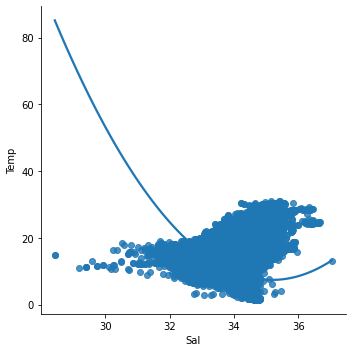

In [7]:
# Plotting the data scatter
sns.lmplot(x = 'Sal',y = 'Temp',data=df_binary,order=2,ci=None)

In [8]:
# Eliminating NaN or missing input numbers

df_binary.fillna(method='ffill',inplace=True)

C:\Users\bhargavi\anaconda3\lib\site-packages\pandas\core\frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [10]:
# Training your model
x = np.array(df_binary['Sal']).reshape(-1,1)
y = np.array(df_binary['Temp']).reshape(-1,1)
df_binary.dropna(inplace = True)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

regr = LinearRegression()
regr.fit(x_train,y_train)
print(regr.score(x_test,y_test))


0.20862991879350024


C:\Users\bhargavi\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


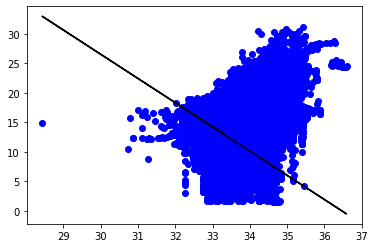

In [14]:
# Data scattered for predicted values
y_pred = regr.predict(x_test)
plt.scatter(x_test,y_test,color='b')
plt.plot(x_test,y_pred,'k')
plt.show()

0.8319124550419534


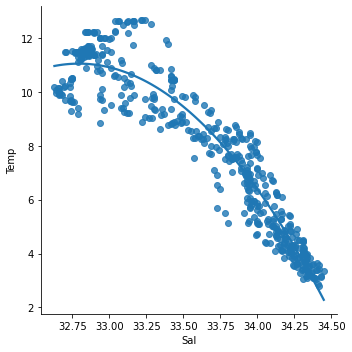

In [20]:
# working with a smaller dataset

df_binary500 = df_binary[:][:500]
sns.lmplot(x='Sal',y='Temp',data=df_binary500,order=2,ci=None)
df_binary500.fillna(method='ffill',inplace=True)
x = np.array(df_binary500['Sal']).reshape(-1,1)
y = np.array(df_binary500['Temp']).reshape(-1,1)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)
regr = LinearRegression()

# Train Dataset: Used to fit the machine learning model.
regr.fit(x_train,y_train)

# Test Dataset: Used to evaluate the fit machine learning model.
print(regr.score(x_test,y_test))


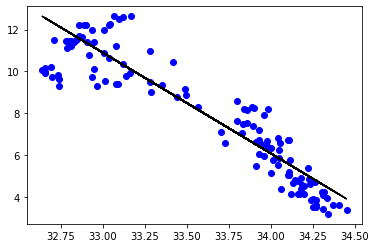

In [17]:
# Data scattered for predicted values
y_pred = regr.predict(x_test)
plt.scatter(x_test,y_test,color='b')
plt.plot(x_test,y_pred,'k')
plt.show()